#### Importing the libraries.

In [76]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [77]:
#import the useful libraries.
import pandas as pd, numpy as numpy
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

Reading Dataset

In [78]:
eda0 = pd.read_csv("loan.csv")
eda0.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [79]:
# finding the shape of dataset
eda0.shape

(39717, 111)

In [80]:
eda0.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [81]:
# Find column names with all null values
null_columns = eda0.columns[eda0.isnull().all()]

print("Column names with all null values:", null_columns)

Column names with all null values: Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_

In [82]:
# Calculate the total number of columns with all null values
total_null_columns = (eda0.isnull().all()).sum()

print("Total number of columns with all null values:", total_null_columns)

Total number of columns with all null values: 54


In [83]:
# dropping the columns with null values and copying it to new dataset
eda1 = eda0.dropna(axis=1, how='all').copy()

In [84]:
# checking the shape of eda1
eda1.shape   #54 columns have been dropped

(39717, 57)

In [85]:
# displaying new dataset
eda1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [86]:
# checking for duplicate columns
# Get a list of column names
columns = eda1.columns

# List to store duplicate column pairs
duplicate_columns = []

# Iterate through each pair of columns
for i in range(len(columns)):
    for j in range(i+1, len(columns)):
        # Compare values of the two columns
        if eda1[columns[i]].equals(eda1[columns[j]]):
            duplicate_columns.append((columns[i], columns[j]))

# Print duplicate column pairs
if len(duplicate_columns) > 0:
    print("Duplicate columns found:")
    for col_pair in duplicate_columns:
        print(col_pair)
else:
    print("No duplicate columns found.")


Duplicate columns found:
('collections_12_mths_ex_med', 'chargeoff_within_12_mths')
('acc_now_delinq', 'delinq_amnt')


Let's check the value count of each of those duplicate columns.

In [87]:
# checking value counts of 'collections_12_mths_ex_med' and 'chargeoff_within_12_mths'
eda1[['collections_12_mths_ex_med', 'chargeoff_within_12_mths']].value_counts()

collections_12_mths_ex_med  chargeoff_within_12_mths
0.0                         0.0                         39661
Name: count, dtype: int64

In [88]:
# checking value counts of 'acc_now_delinq' and 'delinq_amnt'
eda1[['acc_now_delinq', 'delinq_amnt']].value_counts()

acc_now_delinq  delinq_amnt
0               0              39717
Name: count, dtype: int64

In [89]:
# dropping the duplicate columns since there are no variation in the values and hence, it might not be useful for analysis.
eda2 = eda1.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths',
                               'acc_now_delinq', 'delinq_amnt'], axis=1)

In [90]:
# check the size of new dataset
eda2.shape

(39717, 53)

In [91]:
# display cleaned dataset 
eda2.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,policy_code,application_type,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,0.00,Jan-15,171.62,NaN,May-16,1,INDIVIDUAL,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,117.08,1.11,Apr-13,119.66,NaN,Sep-13,1,INDIVIDUAL,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,0.00,Jun-14,649.91,NaN,May-16,1,INDIVIDUAL,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,0.00,Jan-15,357.48,NaN,Apr-16,1,INDIVIDUAL,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,0.00,0.00,May-16,67.79,Jun-16,May-16,1,INDIVIDUAL,0.0,0.0


In [92]:
# printing all columns of new dataset
eda2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Some of the irrelevant columns in the new data set that do not add any importance to analyze the loan default are as follows:
['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'addr_state', 'issue_d', 'pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'policy_code', 'application_type']


In [93]:
# dropping the irrelevant columns
eda3 = eda2.drop(['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'addr_state', 
                  'issue_d', 'pymnt_plan', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 
                  'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                  'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 
                  'last_credit_pull_d', 'policy_code', 'application_type'], axis=1)

In [94]:
# checking the size of data set
eda3.shape

(39717, 28)

In [95]:
# printing the new data set 
eda3.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,tax_liens
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,1,NaN,NaN,3,0,13648,83.70%,9,0.0,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,5,NaN,NaN,3,0,1687,9.40%,4,0.0,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,2,NaN,NaN,2,0,2956,98.50%,10,0.0,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,1,35.0,NaN,10,0,5598,21%,37,0.0,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0,38.0,NaN,15,0,27783,53.90%,38,0.0,0.0


In [96]:
#printing the columns of eda3
eda3.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [97]:
# checking for columns with some null values in it.
col_with_null_values = eda3[eda3.columns[eda3.isnull().any()]]

print(f"Column    : null count ")
for column in col_with_null_values.columns:
    null_count = col_with_null_values[column].isnull().sum()
    print(f"'{column}' : {null_count}")

Column    : null count 
'emp_title' : 2459
'emp_length' : 1075
'mths_since_last_delinq' : 25682
'mths_since_last_record' : 36931
'revol_util' : 50
'pub_rec_bankruptcies' : 697
'tax_liens' : 39


In [98]:
# calculating the percentage of null values in 'mths_since_last_delinq'.
eda3.mths_since_last_delinq.isnull().value_counts(normalize=True) # there are almost 65% of null values

mths_since_last_delinq
True     0.646625
False    0.353375
Name: proportion, dtype: float64

In [99]:
# calculating the percentage of null values in 'mths_since_last_record'.
eda3.mths_since_last_record.isnull().value_counts(normalize=True) # there are almost 93% of null values

mths_since_last_record
True     0.929854
False    0.070146
Name: proportion, dtype: float64

In [100]:
# let's drop 'mths_since_last_record' since there is already a record of bankrupties and liens
eda3 = eda3.drop('mths_since_last_record', axis=1)

In [101]:
# size of cleaned data set
eda3.shape

(39717, 27)

Analyzing various columns.

Univariate Analysis

In [102]:
# analyzing loan amount
eda3.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

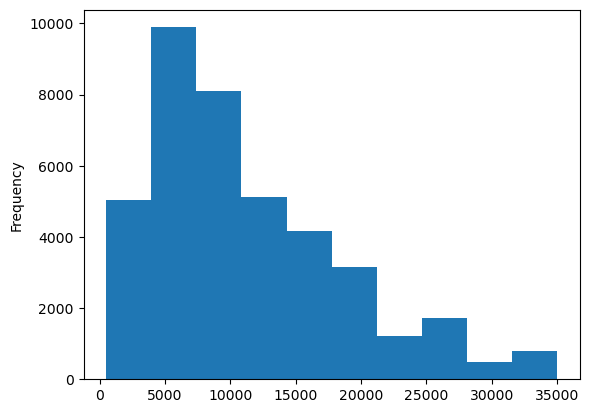

In [103]:
# plotting a histogram for loan amount.
eda3.loan_amnt.plot.hist()
plt.show()

In [104]:
# analyzing the term column
eda3.term.value_counts()

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64

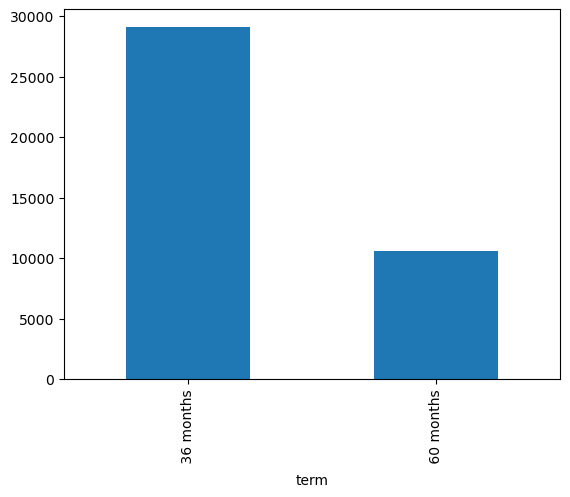

In [105]:
# plotting a bar plot to analyze the term of loan amount
eda3.term.value_counts().plot.bar()
plt.show()

In [106]:
# Analyzing interest rates
eda3.int_rate.value_counts()

int_rate
10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: count, Length: 371, dtype: int64

In [108]:
# handling interest rate column
eda3.int_rate = eda3.int_rate.astype(str).apply(lambda x: float(x[:-1]))
eda3.int_rate.value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [110]:
# analysing interest rates
eda3.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

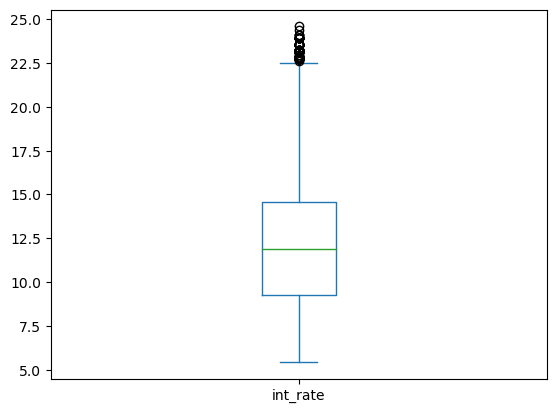

In [109]:
# Checking outliers like high interest rate by plotting box plot.
eda3.int_rate.plot.box()
plt.show()

In [111]:
# Analysing the distribution of installment amounts.
eda3.installment.describe()

count    39717.000000
mean       324.561922
std        208.874874
min         15.690000
25%        167.020000
50%        280.220000
75%        430.780000
max       1305.190000
Name: installment, dtype: float64

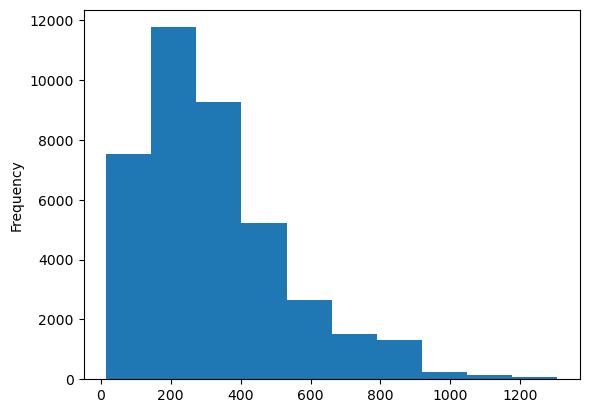

In [113]:
# Checking frequency range of installment amount by plotting histogram.
eda3.installment.plot.hist()
plt.show()

In [115]:
# Analyzing loan grade
eda3.grade.value_counts()

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64

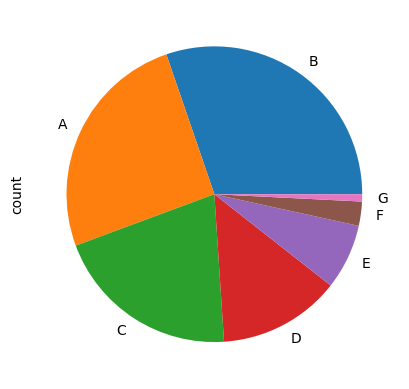

In [116]:
# plotting pie chart for analysing distribution of various grades. Showing the distribution of credit risk among borrowers.
eda3.grade.value_counts().plot.pie()
plt.show()

In [121]:
# Analyzing loan status.
eda3.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

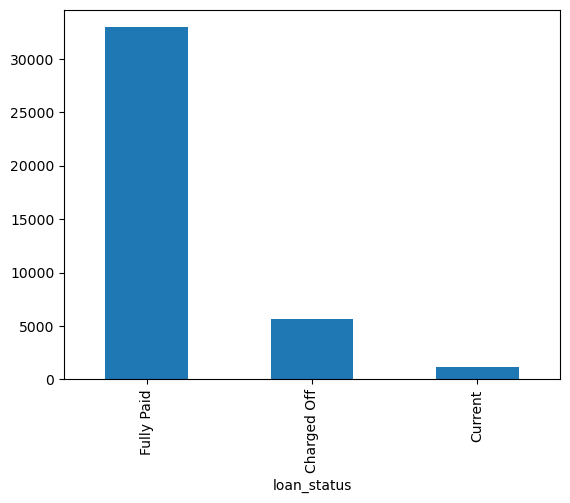

In [123]:
#plotting an bar plot for loan status.
eda3.loan_status.value_counts().plot.bar()
plt.show()

In [124]:
# Analysing debt to income ratio
eda3.dti.value_counts()

dti
0.00     183
12.00     51
18.00     45
19.20     40
13.20     39
        ... 
29.13      1
25.31      1
29.76      1
28.42      1
25.43      1
Name: count, Length: 2868, dtype: int64

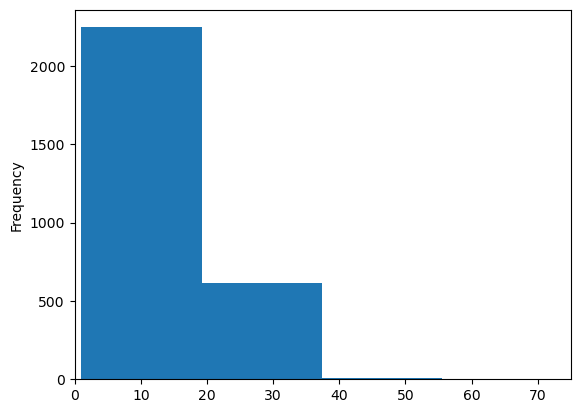

In [126]:
# plotting histogram for dti 
eda3.dti.value_counts().plot.hist()
plt.xlim(0,75)
plt.show()

Bivariate Analysis

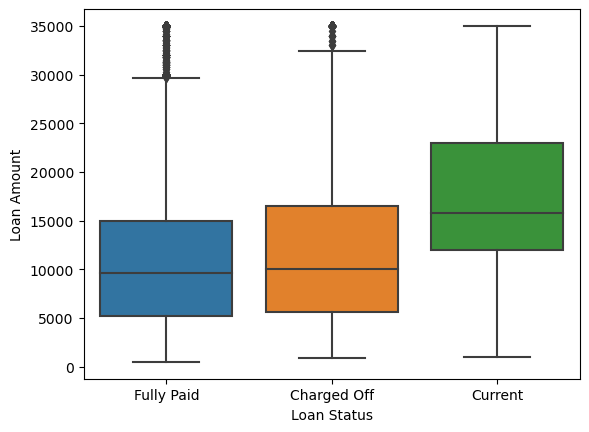

In [131]:
# Exploring how the loan amount varies based on the loan status
sns.boxplot(x='loan_status', y='loan_amnt', data=eda3)
plt.xlabel('Loan Status')
plt.ylabel('')
plt.show()

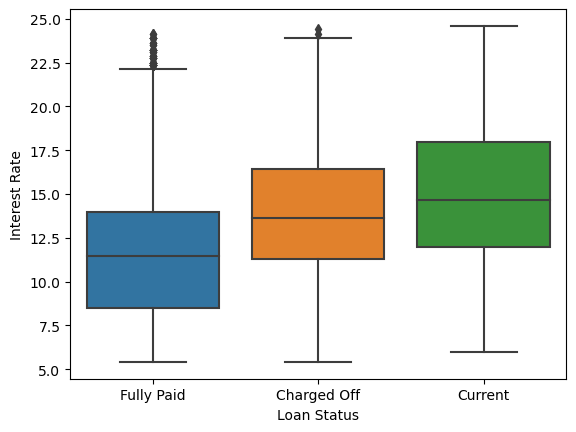

In [165]:
#Investigating the relationship between interest rates and loan status.
sns.boxplot(x='loan_status', y='int_rate', data=eda3)
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()

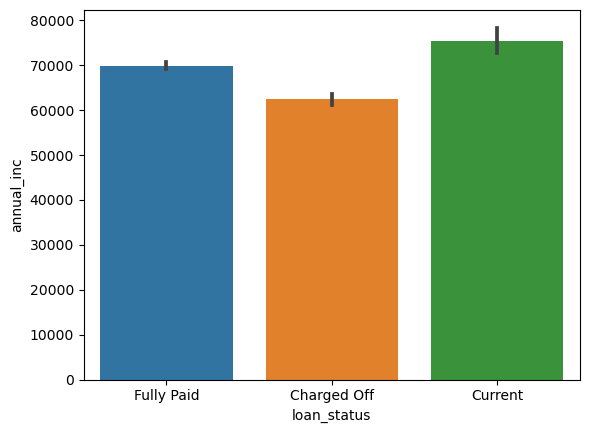

In [139]:
#Analyzing how annual income influences loan status.
sns.barplot(x='loan_status', y='annual_inc', data=eda3)
plt.show()

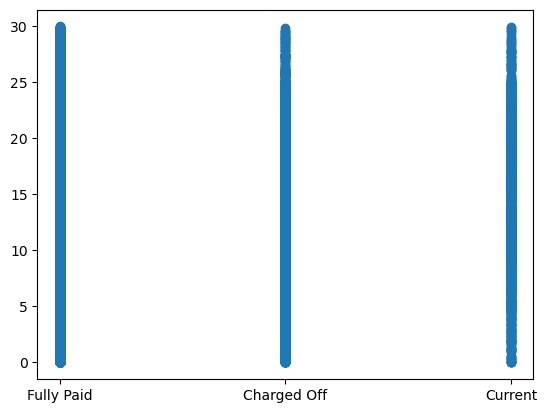

In [145]:
#Analyzing the impact of debt-to-income ratio on loan status.
plt.scatter(eda3.loan_status, eda3.dti)
plt.show()

Multivariate Analysis

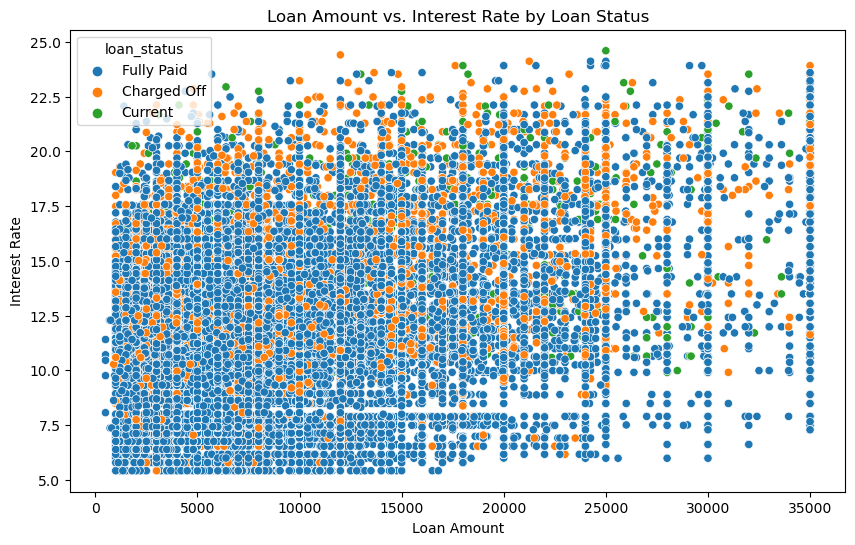

In [157]:
#Exploring how loan amount and interest rate together influence loan status.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loan_amnt', y='int_rate', hue='loan_status', data=eda3)
plt.title('Loan Amount vs. Interest Rate by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Interest Rate')
plt.show()

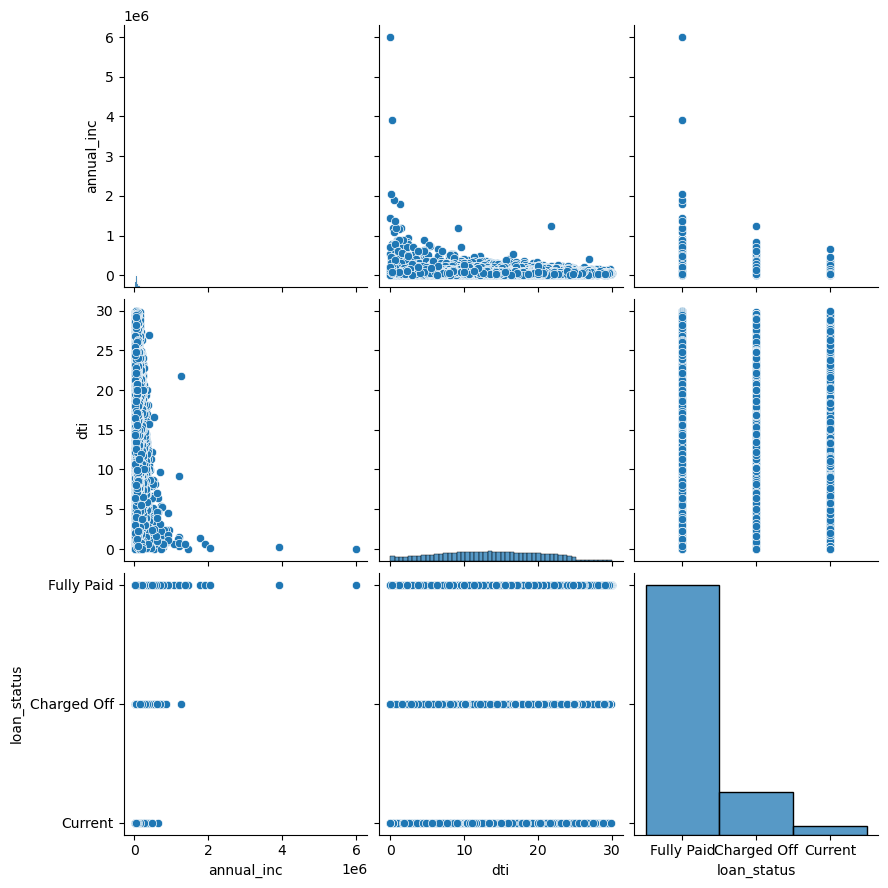

In [162]:
#Analyzing the combined effect of annual income and debt-to-income ratio on loan status.
sns.pairplot(data=eda3, vars=['annual_inc', 'dti','loan_status'], diag_kind='hist', height=3)
plt.show()

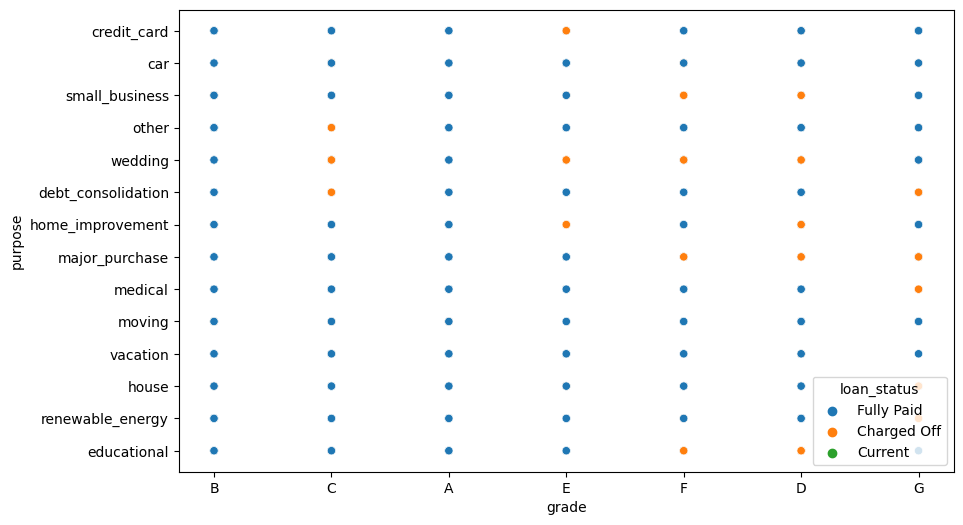

In [163]:
#Investigate how loan grade and loan purpose together affect loan status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='grade', y='purpose', hue='loan_status', data=eda3)
plt.show()